In [2]:
import pandas as pd
import numpy as np

In [7]:
estados = pd.read_csv('brasil_estados.csv')
estados

,Unnamed: 0,uf,codigo,area,populacao,densidade,matricula,idh,receitas,despesas,rendimento,veiculos,regiao_nome,sigla,estado,latitude,longitude
0,0,Acre,12,164123.964,894470,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831,Norte,AC,AC,-9.418079,-69.716126
1,1,Alagoas,27,27843.295,3351543,112.33,490587,0.631,1.195044e+07,1.046063e+07,731,834827,Nordeste,AL,AL,-9.516065,-36.482510
2,2,Amapá,16,142470.762,861773,4.69,136185,0.708,5.396417e+06,4.224464e+06,880,195039,Norte,AP,AP,0.910531,-51.362147
3,3,Amazonas,13,1559167.889,4207714,2.23,705007,0.674,1.732846e+07,1.532490e+07,842,883083,Norte,AM,AM,-3.930346,-63.227020
4,4,Bahia,29,564760.427,14930634,24.82,2034711,0.660,5.019100e+07,4.557016e+07,913,4139107,Nordeste,BA,BA,-12.913858,-40.413045
5,5,Ceará,23,148894.441,9187103,56.76,1198116,0.682,2.842022e+07,2.460835e+07,942,3148369,Nordeste,CE,CE,-4.937464,-39.502044
6,6,Distrito Federal,53,5760.783,3055149,444.66,377622,0.824,2.381221e+07,2.199046e+07,2686,1812473,CentroOeste,DF,DF,-15.794087,-47.887905
7,7,Espírito Santo,32,46074.447,4064052,76.25,502059,0.740,1.968562e+07,1.439234e+07,1477,1936862,Sudeste,ES,ES,-19.889001,-40.813464
8,8,Goiás,52,340203.329,7113540,17.65,877593,0.735,3.788534e+07,2.424838e+07,1306,3909429,CentroOeste,GO,GO,-16.197020,-49.448064
9,9,Maranhão,21,329642.182,7114598,19.81,1178949,0.639,1.850326e+07,1.762717e+07,636,1696683,Nordeste,MA,MA,-4.239932,-44.912812


In [8]:
estados.groupby('regiao_nome')['area'].mean().reset_index()

,regiao_nome,area
0,CentroOeste,401579.166250
1,Nordeste,172463.001000
2,Norte,550072.849000
3,Sudeste,231141.369500
4,Sul,192245.606333


In [21]:
area_proporcional = estados[['regiao_nome','uf', 'area']].merge(
    estados.groupby('regiao_nome')['area'].sum().reset_index(),
    on = 'regiao_nome',
how = 'left'
)
area_proporcional

,regiao_nome,uf,area_x,area_y
0,Norte,Acre,164123.964,3850509.943
1,Nordeste,Alagoas,27843.295,1552167.009
2,Norte,Amapá,142470.762,3850509.943
3,Norte,Amazonas,1559167.889,3850509.943
4,Nordeste,Bahia,564760.427,1552167.009
5,Nordeste,Ceará,148894.441,1552167.009
6,CentroOeste,Distrito Federal,5760.783,1606316.665
7,Sudeste,Espírito Santo,46074.447,924565.478
8,CentroOeste,Goiás,340203.329,1606316.665
9,Nordeste,Maranhão,329642.182,1552167.009


In [28]:
area_rank = estados.groupby(
    ['regiao_nome', 'uf']
    )['area'].sum().rank()
area_rank

regiao_nome  uf                 
CentroOeste  Distrito Federal        1.0
             Goiás                  21.0
             Mato Grosso            25.0
             Mato Grosso do Sul     22.0
Nordeste     Alagoas                 3.0
             Bahia                  23.0
             Ceará                  11.0
             Maranhão               20.0
             Paraíba                 7.0
             Pernambuco              9.0
             Piauí                  17.0
             Rio Grande do Norte     6.0
             Sergipe                 2.0
Norte        Acre                   12.0
             Amapá                  10.0
             Amazonas               27.0
             Pará                   26.0
             Rondônia               15.0
             Roraima                14.0
             Tocantins              18.0
Sudeste      Espírito Santo          5.0
             Minas Gerais           24.0
             Rio de Janeiro          4.0
             São Paulo  

In [42]:
area_rank = estados.groupby(
    ['uf']
    )['area'].sum().rank().reset_index().sort_values(by='area', ascending=False)
area_rank

,uf,area
3,Amazonas,27.0
15,Pará,26.0
10,Mato Grosso,25.0
12,Minas Gerais,24.0
4,Bahia,23.0
11,Mato Grosso do Sul,22.0
8,Goiás,21.0
9,Maranhão,20.0
19,Rio Grande do Sul,19.0
26,Tocantins,18.0


In [49]:
area_rank = estados.groupby(['regiao_nome', 'uf'])['area'].sum().reset_index()
area_rank['rank_area_regiao'] = \
area_rank.groupby('regiao_nome')['area'].rank(method='first')
area_rank

,regiao_nome,uf,area,rank_area_regiao
0,CentroOeste,Distrito Federal,5760.783,1.0
1,CentroOeste,Goiás,340203.329,2.0
2,CentroOeste,Mato Grosso,903207.019,4.0
3,CentroOeste,Mato Grosso do Sul,357145.534,3.0
4,Nordeste,Alagoas,27843.295,2.0
5,Nordeste,Bahia,564760.427,9.0
6,Nordeste,Ceará,148894.441,6.0
7,Nordeste,Maranhão,329642.182,8.0
8,Nordeste,Paraíba,56467.242,4.0
9,Nordeste,Pernambuco,98067.881,5.0


In [31]:
media = estados['area'].mean()
estados['classe_area'] = estados['area'].apply(
    lambda x : 'Acima' if x > media else 'Abaixo'
)
estados

,Unnamed: 0,uf,codigo,area,populacao,densidade,matricula,idh,receitas,despesas,rendimento,veiculos,regiao_nome,sigla,estado,latitude,longitude,classe_area
0,0,Acre,12,164123.964,894470,4.47,157646,0.663,6.632883e+06,6.084417e+06,890,277831,Norte,AC,AC,-9.418079,-69.716126,Abaixo
1,1,Alagoas,27,27843.295,3351543,112.33,490587,0.631,1.195044e+07,1.046063e+07,731,834827,Nordeste,AL,AL,-9.516065,-36.482510,Abaixo
2,2,Amapá,16,142470.762,861773,4.69,136185,0.708,5.396417e+06,4.224464e+06,880,195039,Norte,AP,AP,0.910531,-51.362147,Abaixo
3,3,Amazonas,13,1559167.889,4207714,2.23,705007,0.674,1.732846e+07,1.532490e+07,842,883083,Norte,AM,AM,-3.930346,-63.227020,Acima
4,4,Bahia,29,564760.427,14930634,24.82,2034711,0.660,5.019100e+07,4.557016e+07,913,4139107,Nordeste,BA,BA,-12.913858,-40.413045,Acima
5,5,Ceará,23,148894.441,9187103,56.76,1198116,0.682,2.842022e+07,2.460835e+07,942,3148369,Nordeste,CE,CE,-4.937464,-39.502044,Abaixo
6,6,Distrito Federal,53,5760.783,3055149,444.66,377622,0.824,2.381221e+07,2.199046e+07,2686,1812473,CentroOeste,DF,DF,-15.794087,-47.887905,Abaixo
7,7,Espírito Santo,32,46074.447,4064052,76.25,502059,0.740,1.968562e+07,1.439234e+07,1477,1936862,Sudeste,ES,ES,-19.889001,-40.813464,Abaixo
8,8,Goiás,52,340203.329,7113540,17.65,877593,0.735,3.788534e+07,2.424838e+07,1306,3909429,CentroOeste,GO,GO,-16.197020,-49.448064,Acima
9,9,Maranhão,21,329642.182,7114598,19.81,1178949,0.639,1.850326e+07,1.762717e+07,636,1696683,Nordeste,MA,MA,-4.239932,-44.912812,Acima


In [33]:
estados.pivot_table(
    index = 'regiao_nome',
    columns = 'classe_area',
    values = 'area',
    aggfunc = ['sum', 'mean', 'count'],
    fill_value = 0
).reset_index()

regiao_nome          sum                        mean  \
classe_area                    Abaixo        Acima         Abaixo   
0            CentroOeste     5760.783  1600555.882    5760.783000   
1               Nordeste   657764.400   894402.609   93966.342857   
2                  Norte  1045471.256  2805038.687  209094.251200   
3                Sudeste   338044.355   586521.123  112681.451667   
4                    Sul   576736.819        0.000  192245.606333   

                           count        
classe_area         Acima Abaixo Acima  
0            5.335186e+05      1     3  
1            4.472013e+05      7     2  
2            1.402519e+06      5     2  
3            5.865211e+05      3     1  
4            0.000000e+00      3     0

In [37]:
soma = estados['area'].sum()
maiores_estados = estados[['uf', 'area']].sort_values(by='area', ascending=False)
maiores_estados['percentual'] = round(maiores_estados['area'] / soma * 100, 2)
maiores_estados['acumulado'] = maiores_estados['percentual'].cumsum()
maiores_estados['curva_abc'] = maiores_estados['acumulado'].apply(
    lambda x: 'A' if x <= 65 else ('B' if x <= 90 else 'C')
)
maiores_estados['legenda']= maiores_estados.apply(
    lambda x : x['uf'] if x['curva_abc'] != 'C' else 'outros', axis = 1
)
maiores_estados

,uf,area,percentual,acumulado,curva_abc,legenda
3,Amazonas,1559167.889,18.32,18.32,A,Amazonas
13,Pará,1245870.798,14.64,32.96,A,Pará
10,Mato Grosso,903207.019,10.61,43.57,A,Mato Grosso
12,Minas Gerais,586521.123,6.89,50.46,A,Minas Gerais
4,Bahia,564760.427,6.64,57.10,A,Bahia
11,Mato Grosso do Sul,357145.534,4.20,61.30,A,Mato Grosso do Sul
8,Goiás,340203.329,4.00,65.30,B,Goiás
9,Maranhão,329642.182,3.87,69.17,B,Maranhão
20,Rio Grande do Sul,281707.156,3.31,72.48,B,Rio Grande do Sul
26,Tocantins,277466.763,3.26,75.74,B,Tocantins


In [41]:
maiores_areas = estados[['uf', 'area']].sort_values(by='area', ascending=False)
maiores_areas['anterior'] = maiores_areas['area'].shift(1)
maiores_areas['diferenca'] = maiores_areas['area'].shift(1) - maiores_areas['area']
maiores_areas['percentual'] = maiores_areas['area'].pct_change(periods=1)
maiores_areas

,uf,area,anterior,diferenca,percentual
3,Amazonas,1559167.889,NaN,NaN,NaN
13,Pará,1245870.798,1559167.889,313297.091,-0.200939
10,Mato Grosso,903207.019,1245870.798,342663.779,-0.275040
12,Minas Gerais,586521.123,903207.019,316685.896,-0.350624
4,Bahia,564760.427,586521.123,21760.696,-0.037101
11,Mato Grosso do Sul,357145.534,564760.427,207614.893,-0.367616
8,Goiás,340203.329,357145.534,16942.205,-0.047438
9,Maranhão,329642.182,340203.329,10561.147,-0.031044
20,Rio Grande do Sul,281707.156,329642.182,47935.026,-0.145415
26,Tocantins,277466.763,281707.156,4240.393,-0.015052


In [52]:
estados[['area', 'populacao', 'matricula', 'idh',
 'receitas', 'despesas', 'rendimento', 'veiculos']].corr()

,area,populacao,matricula,idh,receitas,despesas,rendimento,veiculos
area,1.000000,0.045726,0.103052,-0.210447,0.009131,0.012493,-0.242461,-0.022114
populacao,0.045726,1.000000,0.994712,0.368471,0.983539,0.981515,0.365265,0.967715
matricula,0.103052,0.994712,1.000000,0.304599,0.963954,0.962989,0.307704,0.944988
idh,-0.210447,0.368471,0.304599,1.000000,0.478499,0.454881,0.947880,0.483255
receitas,0.009131,0.983539,0.963954,0.478499,1.000000,0.997481,0.468843,0.991868
despesas,0.012493,0.981515,0.962989,0.454881,0.997481,1.000000,0.448210,0.991337
rendimento,-0.242461,0.365265,0.307704,0.947880,0.468843,0.448210,1.000000,0.460790
veiculos,-0.022114,0.967715,0.944988,0.483255,0.991868,0.991337,0.460790,1.000000


In [54]:
import seaborn as sns

<Axes: xlabel='matricula', ylabel='populacao'>

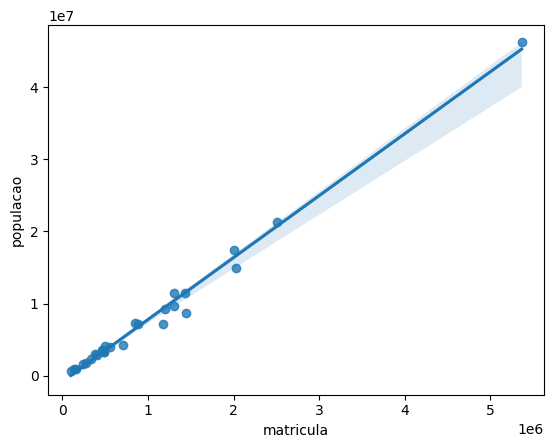

In [57]:
sns.regplot(data = estados, x = 'matricula', y = 'populacao')